# Import PV Cell data

In [147]:
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline


In [77]:
def add_state(row):
    tester = row['Postcode'] 
    if tester < 800:
        val="ACT"
    elif tester < 1000:
        val = "NT"
    elif tester < 2600:
        val = "NSW"
    elif tester < 2619:
        val = "ACT"
    elif tester < 2900:
        val = "NSW"
    elif tester < 2921:
        val = "ACT"
    elif tester < 3000:
        val = "NSW"
    elif tester < 4000:
        val = "Victoria"
    elif tester < 5000:
        val = "Queensland"
    elif tester < 6000:
        val = "SA"
    elif tester < 6000:
        val = "WA"
    elif tester < 8000:
        val = "WA"
    elif tester < 9000:
        val = "Victoria"
    else: 
        val="Queensland"
    return val

In [117]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [143]:
path = r'.\ExtraDataFiles'
all_files = glob.glob(path + "/*all data.xlsx")
dfs =[]
#print(all_files)

for i, f in enumerate(all_files):
    # Some excel files have changes sheet name
    if i < 14 :
        sheet_name= "SGU-Solar"
        header_size = 2
    elif i < 19:
        sheet_name= "SGU - Solar"
        header_size = 2
    else:
        sheet_name= "SGU-Solar"
        header_size = 3
    
    filename = os.path.basename(f)
    #print(filename)
    #print(i)
    df = pd.read_excel(f, header=header_size, usecols="A, AC, AE, AG, AI, AK, AM, AO, AQ, AS, AU,AW,AY")
    df.columns = ['Postcode', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    df["Postcode"] = df["Postcode"].astype("int")
    df['State'] = df.apply(add_state, axis=1)
    
    df = df.groupby('State').sum().reset_index()
    df["Year"] = i + 2003
    df.drop('Postcode', axis=1, inplace=True)
    
    dfs.append(df)
    

df_item = pd.concat(dfs, ignore_index=True)
pv_install = pd.melt(df_item, id_vars=['State','Year'], value_vars=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
pv_install.columns = ['State', 'Year', 'Month', 'KW']
pv_install = pv_install[['State', 'Year', 'Month', 'KW']]


,State,Year,Month,KW
0,ACT,2003,1,0.000
1631,ACT,2016,12,855.634
1407,ACT,2004,11,0.000
896,ACT,2011,7,1100.421
322,ACT,2009,3,43.114
...,...,...,...,...
944,WA,2017,7,15678.076
937,WA,2016,7,10658.842
930,WA,2015,7,9589.642
1098,WA,2019,8,21538.275


# Fix state data

Data consolidated from files to state, need to change from month columns to 1 column

In [139]:
pv_install

,State,Year,Month,KW
0,ACT,2003,1,0.000
1,NSW,2003,1,9.450
2,NT,2003,1,0.000
3,Queensland,2003,1,11.290
4,SA,2003,1,36.055
...,...,...,...,...
1675,NT,2022,12,646.995
1676,Queensland,2022,12,47769.052
1677,SA,2022,12,17896.838
1678,Victoria,2022,12,15864.906


State
ACT           AxesSubplot(0.125,0.2;0.775x0.68)
NSW           AxesSubplot(0.125,0.2;0.775x0.68)
NT            AxesSubplot(0.125,0.2;0.775x0.68)
Queensland    AxesSubplot(0.125,0.2;0.775x0.68)
SA            AxesSubplot(0.125,0.2;0.775x0.68)
Victoria      AxesSubplot(0.125,0.2;0.775x0.68)
WA            AxesSubplot(0.125,0.2;0.775x0.68)
Name: KW, dtype: object

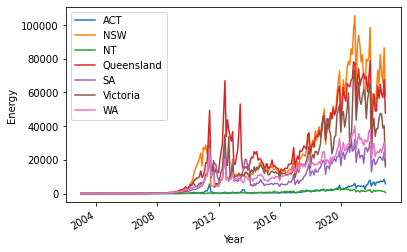

In [151]:
pv_install['Date'] = pd.to_datetime(dict(year=pv_install.Year, month=pv_install.Month, day=1))

pv = pv_install[['State', 'Date', 'KW']]
pv.set_index("Date", inplace=True)
pv.groupby("State")["KW"].plot(legend=True, xlabel="Year", ylabel="Energy - KW")

In [153]:
pv

,State,KW
Date,,
2003-01-01,ACT,0.000
2003-01-01,NSW,9.450
2003-01-01,NT,0.000
2003-01-01,Queensland,11.290
2003-01-01,SA,36.055
...,...,...
2022-12-01,NT,646.995
2022-12-01,Queensland,47769.052
2022-12-01,SA,17896.838


# Australian population

In [140]:
df = pd.read_excel('./ExtraDataFiles/State populations.xlsx', header=10, sheet_name='Data1', usecols="A, T:AA")
df.columns= ['Date', 'NSW', 'Victoria', 'Queensland', 'SA', 'WA', 'Tasmania', 'NT','ACT']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)

population = pd.melt(df, id_vars=['Year','Month'], value_vars=['NSW', 'Victoria', 'Queensland', 'SA', 'WA', 'Tasmania', 'NT','ACT'])
population.columns = ['Year', 'Month', 'State', 'Population']
population = population[['State', 'Year', 'Month', 'Population']]

In [146]:
population

,State,Year,Month,Population,Date
0,NSW,1981,9,5249455,1981-09-01
1,NSW,1981,12,5266894,1981-12-01
2,NSW,1982,3,5286119,1982-03-01
3,NSW,1982,6,5303580,1982-06-01
4,NSW,1982,9,5315846,1982-09-01
...,...,...,...,...,...
1339,ACT,2022,6,456915,2022-06-01
1340,ACT,2022,9,459686,2022-09-01
1341,ACT,2022,12,461172,2022-12-01
1342,ACT,2023,3,464700,2023-03-01


State
ACT           AxesSubplot(0.125,0.125;0.775x0.755)
NSW           AxesSubplot(0.125,0.125;0.775x0.755)
NT            AxesSubplot(0.125,0.125;0.775x0.755)
Queensland    AxesSubplot(0.125,0.125;0.775x0.755)
SA            AxesSubplot(0.125,0.125;0.775x0.755)
Tasmania      AxesSubplot(0.125,0.125;0.775x0.755)
Victoria      AxesSubplot(0.125,0.125;0.775x0.755)
WA            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Population, dtype: object

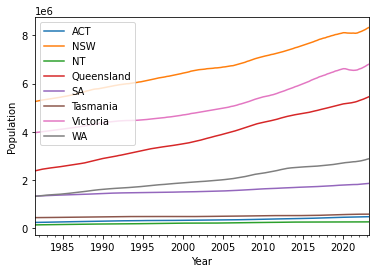

In [150]:
population['Date'] = pd.to_datetime(dict(year=population.Year, month=population.Month, day=1))

pop = population[['State', 'Date', 'Population']]
pop.set_index("Date", inplace=True)
pop.groupby("State")["Population"].plot(legend=True, xlabel="Year", ylabel="Population")

